# Overview

In this project, you will demonstrate your knowledge of descriptive statistics by conducting an experiment dealing with drawing from a deck of playing cards and creating a write up containing your findings.

This experiment will require the use of a standard deck of playing cards. This is a deck of fifty-two cards divided into four suits (spades (♠), hearts (♥), diamonds (♦), and clubs (♣)), each suit containing thirteen cards (Ace, numbers 2-10, and face cards Jack, Queen, and King). You can use either a physical deck of cards for this experiment or you may use our data generator in the Generate Data section.

For the purposes of this task, assign each card a value: The Ace takes a value of 1, numbered cards take the value printed on the card, and the Jack, Queen, and King each take a value of 10.

In [1]:
# Basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Single Draws

If we draw single cards, we have a small sample space so we can describe the whole population.

In [104]:
numbers = ['A', 2, 3, 4, 5, 6, 7, 8, 9, 10, 'J', 'Q', 'K']
suits = ['s', 'h', 'd', 'c']
tmp_deck = []

# Let's create all the cards
for number in numbers:
    for suit in suits:
        value = number
        
        if number == 'A':
            value = 1
        elif number in set(['J', 'Q', 'K']):
            value = 10
            
        tmp_deck.append({'number': number, 'suit': suit, 'value': value})
        
deck = pd.DataFrame(tmp_deck)
print(deck.head())

  number suit  value
0      A    s      1
1      A    h      1
2      A    d      1
3      A    c      1
4      2    s      2


Once we have the basic deck created, we can get some basic metrics from the values of the cards:

In [109]:
# Get basic metrics
mean = deck.mean().value
median = deck.median().value
sd = deck.std(ddof=0).value #sd for the whole population, not a sample

print('#'*40)
print("mean: {:.2f}\nmedian: {:.2f}\nsd: {:.2f}".format(mean, median, sd))
print('#'*40)

########################################
mean: 6.54
median: 7.00
sd: 3.15
########################################


We can also see the histogram, skewed to the right because there are a lot of cards with value `10`:

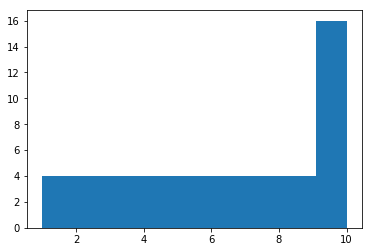

In [107]:
plt.hist(deck['value'], bins=10)
plt.show()

## Three card draws

If we draw cards 3 at a time, we don't have access to the whole sample space so we have to work with random samples, and apply the **Central Limit Theorem**.

Let's start by creating 10,000 random picks:

In [112]:
frames = []
for i in range(10000):
    draw = deck.sample(3, replace=False) # Take a sample (n=3), without replacing
    draw['draw'] = i+1 # The number of the draw, shared by the 3 draws of each round
    frames.append(draw)
draws = pd.concat(frames).reset_index()
print(draws.head(6))

   index number suit  value  draw
0      3      A    c      1     1
1     24      7    s      7     1
2     48      K    s     10     1
3     29      8    h      8     2
4     34      9    d      9     2
5     48      K    s     10     2


- Create a histogram of the sampled three-card sums. Compare its shape to that of the original distribution. How are they different, and can you explain why this is the case?

If we get the sums of each 3-card draw and create a new histogram, we can see that it follows a normal distribution with a small glitch on 30, as it's very probable to pick 3 cards of value 10.

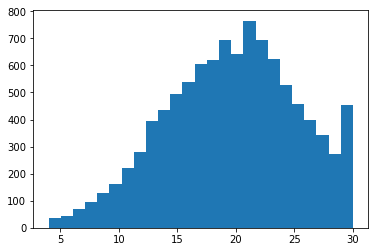

In [68]:
sum_by_draw = draws.groupby('draw').sum()
plt.hist(sum_by_draw.values, bins=25)
plt.show()

We can describe the samples taken by getting some metrics: 

In [116]:
sum_mean = np.mean(sum_by_draw.values)
sum_median = np.median(sum_by_draw.values)
sum_sd = np.std(sum_by_draw.values) #sample sd

print("mean: {:.2f}\nmedian: {:.2f}\nsd: {:.2f}".format(sum_mean, sum_median, sum_sd))
print(sum_by_draw.describe())

mean: 19.55
median: 20.00
sd: 5.40
              value
count  10000.000000
mean      19.553100
std        5.400805
min        4.000000
25%       16.000000
50%       20.000000
75%       23.000000
max       30.000000


## Estimations

- Within what range will you expect approximately 90% of your draw values to fall?
If we want a 90% accuracy, then we need a 5% padding on each side. If we consult the z-table we can see that 95% corresponds to a z-score of 1.64, so the range of z-scores will be [-1.64, 1.64]. If we convert the z-scores to values of x we get the range [x1, x2]:

  x1 = -1.64*5.40+19.55 = 10.69

  x2 = 1.64*5.40+19.55 = 28.80
  
  **That means that 90% of our draws will be between 10.69 and 28.80.**
  

- What is the approximate probability that you will get a draw value of at least 20?
We have to convert 20 to z-score, and look it up on the table:

  z = (20 - 19.55)/5.40 = 0.08
  
  on the table, thats p' = 0.5319. If we want 'at least' that value, we have to reverse it:
  
  p = 1 - p' = 1 - 0.5319 = **0.4682**

## Extra stuff

As we can see, the random generation of cards worked fine. There is a similar number of cards generated bu suit and by number:

In [151]:
draws_by_suit = draws.groupby('suit').size()
print(draws_by_suit)

suit
c    7595
d    7554
h    7415
s    7436
dtype: int64


In [155]:
print(draws.groupby('number').size())

number
2     2326
3     2255
4     2289
5     2341
6     2291
7     2272
8     2363
9     2330
10    2253
A     2271
J     2366
K     2390
Q     2253
dtype: int64


## References

- [statistics formula reference](http://stattrek.com/statistics/formulas.aspx)
- [pyplot documentation](https://matplotlib.org/api/pyplot_api.html)
- [pandas documentation](http://pandas.pydata.org/pandas-docs/stable/)
- [python 'format' documentation](https://pyformat.info/)